In [3]:
import numpy as np
import random
from random import randrange
import matplotlib.pyplot as plt

# Perceptrons

## Part 1

In order to gain a deeper understanding of Machine Learning and Neural Networks, we are going to have to start out by learning about Perceptrons.  In this notebook we will be building our own Perceptron class by hand, examining its performance on different datasets, and learning how to use prebuilt python libraries to implement this classifier.   



Perceptrons are the building blocks of Neural Networks, and while this may sound complicated, their function is well defined by simple Linear Algebra concepts that you are already very familiar with.  As with Neural Networks in general, Perceptrons can be understood through an analogy to biology.  Our brain is composed of Neurons; each Neuron has many dendrites branching out to recieve signals, a cell body that process these inputs, and a single Axon which sends out information to other Neurons.  While a single Neuron cannot accomplish much on its own, combining a whole network of them allows for the incedible functionality that we get from our brain.  An Artificial Neural Network functions in much the same way, with powerful emergent properties coming out of the combination of simple building blocks.  In this analogy, the Perceptron acts as a single Neuron.  And while in later weeks we will examine how Neural Networks are formed by linking these together, this week we will focus on the structure of a single Perceptron and the problems it is able to solve.

### Introduction

A Perceptron is known as a Binary Linear Classifier.  This means it is a good model to use so long as we have a set of linearly seperable data that we want to put into two different categories.  While later in this homework you will look into the different python toolkits that allow us to work with Perceptrons, we will start off by building one by hand.  Perceptrons are relatively simple to construct, and doing so should give you a deeper understanding of how and when to use the prebuilt libraries.

![title](Materials/perceptronModel.png)

Above is a picture of a Perceptron. From here the components should be pretty easy to see.  We have an array of inputs, their corresponding weights, and an activation function (in the above model this activation function is more specifically a step function).  Make sure this picture makes sense to you, because now we will be building out a Perceptron class.  <br>Specifically, we want our Perceptron class to be able to do the following:
* Take a weighted sum
* Compute an activation function
* Train our weights
* Predict a classification

It is okay if all of those bullet points don't make sense to you right now.  We suggest scrolling down to read over the perceptron class and get a sense for what code you need to fill in.  But the specifics are covered in the next few sections, going over precisely what needs to be implemented and why.

## (TODO) Weighted Sum

The first step in building a Perceptron is being able to calculate the weighted sum. The summation of weighted inputs should draw your mind to a familiar concept.  Note how this changes when you want process multiple inputs at once. Specifically for a $d$ dimensioned datapoint, the function we are coding is as follows:
$$weightedSum=\sum_{i=1}^d x_i*w_i$$

Fill in **Part1** of the weightedSum function.  This function should be able to handle multiple inputs at once, where $X$ is passed in as a $R^{nxd}$ dimensioned matrix where $n$ is the number of datapoints and $d$ is their dimension.

## (TODO) Activation Function

Next we will take a look at the activation function.  An activation function is a non-lineaer function that in our case maps a value to a binary output.  There are a lot of different activation functions that can be used, but the one we use for Perceptron is very simple:

$$ f(x) = 
        \begin{cases}
        1, x \geq 0 \\
        -1, x < 0
        \end{cases} 
$$
 

When we pass in our weighted sum to this activation function, we are using information about a point of data to assign it to one of two categories, -1 or 1.  The binary part of Binary Linear Classifier should now make sense. We have started a function called activation below, fill in the code for **Part 2** so that the activation performs as it is defined above.

## (TODO) Prediction

A Perceptron should be able to take an input and predict what class it belongs to, -1 or 1.  With what we have currently, you should be able to implement this logic.  Write the code for **Part 3** in the prediction function of the Perceptron class.  Make sure to utalize the functions you have already written. 

## (TODO) Train Weights

We will not be able to get a good prediction for our data if we don't have the correct weights.  Really, the main 
point of Perceptron is to determine the weight on each input that will allow us to achieve accurate classification of our data.  We do this by initializing our weights to zero and then using the Perceptron update formula.  To perform an update, we will loop through every datapoint and if that point (with true value $y^*_i$) is misclassified, change the weights using:

$${w}_{new} = {w}_{old} + r * y^*_i * {x}_i$$

Implement this update formula in **Part 4** of the train function below

As this point you should have two questions.  What is r? And when do we stop updating?  r is simply our learning rate, it scales how much our weights change each update.  This is know as a hyperparameter, and while you don't need to understand what that means right now, just know it is a value we can change to optimize our performace.  Today just set r=.1 and don't worry about it further. And as for when to stop updating, this ideally done once we have no incorrect classifications.  However, we may not always have data that can be seperated, and we don't want to be stuck in an infinite loop.  Therefore it is good practice to put a break condition into the code such as a max length of time or number of itterations.



In [13]:
class Perceptron():
    """
    Perceptron class for Binary Linear Classification.
    """
    weights = []
        
    def weightedSum(inputs,weights):
        """
        Write the code for calculating the Perceptrons weighted sum.
        inputs - nxd dimensional matrix

        return - nx1 column vector of weighted sums
        """
        result = None
        #Use self.weights for the weights
        #TODO: PART 1
        #Start 
        result = inputs@weights
        #End

        return result

    def activation(x):
        """
        Write the code for the Perceptron activation function.
        x - nx1 column vector

        return - nx1 column vector of 1's and 0's
        """
        result = None

        ##TODO: PART 2
        #Start
        x[x>=0] = 1
        x[x<0] = -1
        result = x
        #End

        return result
    
    
    def predict(self,inputs):
        """
        Calculates predicted class for each input
        
        inputs - n x d matrix
        
        return - n x 1 column vector
        """
        pred = []
        #TODO: Part 3
        #Start
        pred = Perceptron.activation(Perceptron.weightedSum(inputs, self.weights))
        #End
        return pred
    
    def train(self,inputs, classes):
        """
        Update self.weights for better classification.
        
        inputs - n x d matrix
        classes - n x 1 column vector
        """
        num_samples = inputs.shape[0]
        dim = inputs.shape[1]
        self.weights = np.zeros((dim,1))
        r = .1

        stop = 10000
        for i in range(stop):
            pred = self.predict(inputs)
            
            for x in range(num_samples):
                #TOD0: Part 4
                #Start
                if classes[x] != pred[x]:
                    modifier = r*classes[x]*inputs[x,:]
                    modifier = modifier.reshape((dim,-1))
                    self.weights += modifier
                #End


## Real Data
With our Perceptron class defined, we can now take a look at how it performs on actual data.  Imagine you are playing a little game with your friends.  Sally has two types of candy; both look identical but one is incredibly spicy.  She lays these candies out on the table according to a linear pattern, and you are trying to avoid the spicy ones while getting the tasty ones.  Sally promises that she will keep the pattern the same for everyone and lets you go last.  

You think that you can train a Perceptron to uncover this pattern, so you pay close attention to where all the tasty and spicy candies were for your other friends.  Run the cell below to generate the observed locations of the candy and their corresponding flavors. 

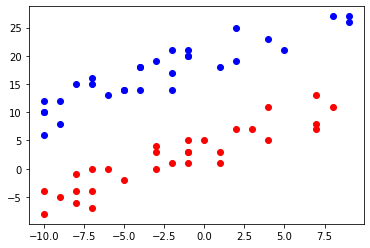

In [29]:
def generateData(num, min_error):
    """
    Generates previously seen candy locations.
    
    return - (data, classes)
        data: num x 2 Matrix of [x, y] positions
        classes: num x 1 column vector of 1s (first num/2) and -1s (last num/2)
    """
    data = []
    classes = []
    split = int(num/2)
    for i in range(split):
        x = randrange(-10,10)
        y = x + 12
        y += randrange(min_error,12)
        data.append([x,y])
        classes.append([1])
    for i in range(split):
        x = randrange(-10,10)
        y = x + 12
        y += randrange(-12,-min_error)
        data.append([x,y])
        classes.append([-1])
    data = np.array(data)
    classes = np.array(classes)
    return (data, classes)

candy_locations, candy_flavors = generateData(60,4)
plt.plot(candy_locations[:30,0], candy_locations[:30,1], 'bo', candy_locations[30:,0], candy_locations[30:,1], 'ro')

## (TODO) Unseen Data
It is almost your turn to play the game, but you want to test how well your Perceptron does before you put your tastebuds on the line.  John is going directly before you, so you try to predict the outcome of his game.  **Finish the getAccuracy function** below that calculates how accurately your perceptron predicts the labels of new data. 

After writing that code, run the cell to see how well your perceptron does on John's data and **comment on the results you see**. Does it do a good job predicting?  Why or why not? How does the visualization help explain what is going on?


Accuracy:  0.75


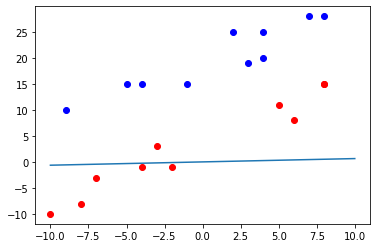

In [30]:
john_locations, john_flavors = generateData(20,4) #You should compare your perceptron's result to john_flavors
candy_perceptron = Perceptron() #Train this perceptron

def getAccuracy(perceptron, X, Y, newX, newY):
    """
    Calculates how accurately perceptron predicts the newY for newX after being trained on X and Y
    
    perceptron - the perceptron to train and use for predictions
    X - X data for training (candy_locations) 
    Y - Labels for training (candy_flavors) 
    newX - newly aquired data for prediction (john_locations)
    newY - labels of new data for determining accuracy of prediction (john_flavors)
    """
    Accuracy = 0
    #TODO
    #Start
    perceptron.train(X, Y)
    pred = perceptron.predict(newX)
    correct = 0
    num_candies = len(pred)
    for i in range(num_candies):
        if newY[i] == pred[i]:
            correct += 1
    Accuracy = correct/num_candies
    #End
    
    print("Accuracy: ", Accuracy)

#Calculating how well your perceptron predicts the flavor of john's candy
getAccuracy(candy_perceptron, candy_locations, candy_flavors, john_locations, john_flavors)

#Visualizing your results
plt.plot(john_locations[:10,0], john_locations[:10,1], 'bo', john_locations[10:,0], john_locations[10:,1], 'ro')
weights = candy_perceptron.weights
x = np.linspace(-10, 10, 1000)
plt.plot(x, -(weights[0]/weights[1])*x)




### Write Your Comments Here:
We clearly have very low accuracy here, the Perceptron does not generate a line that seperates the data well.  The line goes through the origin while our data is clearly seperated by a linear equation with a different y-intercept.

## (TODO) Add Bias

You may have noticed that your perceptron did not do a great job making predictions and separating the data.  In this section we will explore why this is.  If you look closely at the perceptron diagram at the start of this assignment, you should notice one key aspect that we have not included.  It is the constant term that is added into the weighted sum, this is what we call the bias.  To analyze why this is needed, lets take a look at the 2D example of a Perceptron.  If we have inputs $x_1$ and $x_2$ and weights $w_1$ and $w_2$, taking the weighted sum combined with our activation function gives us a boundary at:

$$x_1*w_1 + x_2*w_2 = 0$$
$$x_2 = -\frac{w_1}{w_2}*x_1$$

As you can see, this defines a line at the origin with a slope of $-\frac{w_1}{w_2}$.  If you look back at the results from John's data, you should see that the line our perceptron generated is indeed going through the origin.  Clearly no such line will be good at seperating our data, so we need to add a bias if we want a line with a different y-intercept.  When we append a constant to our input and give it a corresponding weight, our 2D example becomes:

$$1*w_0 + x_1*w_1 + x_2*w_2 = 0$$
$$x_2 = -\frac{w_1}{w_2}*x_1 - \frac{w_0}{w_2}$$

As you can see, this defines a new line with the same slope as before, but a y-intercept now at $- \frac{w_0}{w_2}$.  This extends to higher dimensions as well; a constant term should always be augmented to the input data. **Lets implement this step by filling in the addBias function below.**

In [21]:
def addBias(inputs):
        "Returns the inputs but with the bias added in"
        #TODO: Part 5
        #Start
        inputs = np.concatenate([np.ones((inputs.shape[0], 1)), inputs], axis=1)
        #End
        
        return inputs

## (TODO) Accuracy with Bias
After failing at predicting John's candy flavors the first time, you have your fingers crossed that the added bias term will get your Perceptron working better.  **Fill in code below to calculate your accuracy on the augmented data and comment on the performance you see.**

Accuracy:  1.0
[[-46.5]
 [ -6. ]
 [  4.9]]


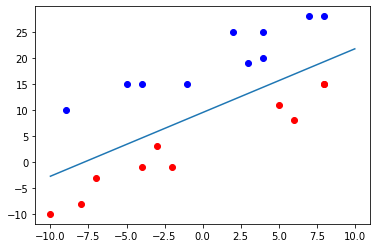

In [31]:
#TODO
#Start
getAccuracy(candy_perceptron, addBias(candy_locations), candy_flavors, addBias(john_locations), john_flavors)
#End

#Visualizing your results
plt.plot(john_locations[:10,0], john_locations[:10,1], 'bo', john_locations[10:,0], john_locations[10:,1], 'ro')
weights = candy_perceptron.weights
x = np.linspace(-10, 10, 1000)
plt.plot(x, -(weights[1]/weights[2])*x - (weights[0]/weights[2]))

### Write Your Comments Here:
Adding the bias in fixes our issues.  The Perceptron can now generate an appropriate boundary that exactly seperates our data.

## Final Run
It is finally your turn to play the game; armed with your perceptron you are feeling very confident in your chances of avoiding all of the spicy candy. Sally puts down the candy on the table following the same linear pattern as before.  You run your perceptron and eat all the candies that is predicts to be tasty.  Look at the outpu below and comment on the results you see.  **Did you end up eating any spicy candy? If so, what do you think went wrong? And come up with at least one thing you might be able to do to increase your accuracy.**

Accuracy:  0.95
[[-46.5]
 [ -6. ]
 [  4.9]]


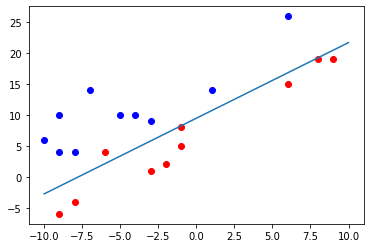

In [32]:
sally_locations, sally_flavors = generateData(20,0) 
getAccuracy(candy_perceptron, addBias(candy_locations), candy_flavors, addBias(sally_locations), sally_flavors)
#Visualizing you results
plt.plot(sally_locations[:10,0], sally_locations[:10,1], 'bo', sally_locations[10:,0], sally_locations[10:,1], 'ro')
weights = candy_perceptron.weights
x = np.linspace(-10, 10, 1000)
plt.plot(x, -(weights[1]/weights[2])*x - (weights[0]/weights[2]))


### Write Your Comments Here:
Unless you are very lucky, you probably noticied that the perceptron misclassified some of the candy.  Even after taking data from your friends' games, the Perceptron was not able to pick up on the exact linear pattern that Sally was following.  So when she laid out the candy for your, some of the pieces right near the boundary were labeled incorrectly.  There are a couple valid solutions, an easy one is to watch your friends play more games so you can gather more data.  Another less obvious solution that touches on topics learned later in this course would be to pick a boundary line exactly inbetween the two classes of data (if you scroll up you should see that our Perceptron's line isn't totally centered)

## Part 1 Conclusions

Hopefully this first part of the notebook has given you a better understanding of what a Perceptron is and how they are used.  After building your own Perceptron class you should not only understand why it is called a Binary Linear Classifier, but also see the importance of the bias term.  Finally, the last section should have made clear some of the shortcomings of Perceptron, especially when we are lacking data.  In the next part of this notebook we will be exploring how Perceptron can (and can't) be used on some more advanced problems.  You will also be introcuded to the prebuilt python libraries that you can use to implement Perceptron. 